## Importing the dependencies
Here we are just importing some popular libraries and their functions that we will be using.

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, naive_bayes, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Libraries for text processing
import re, nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Importing the data
The dataset that we will be using is present at this Google drive link.

So we store the drive path as a variable and then use it to get our data in our colab directory.

In [ ]:
#Data: https://drive.google.com/file/d/1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV/view?usp=sharing
id = "1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV"
path = "https://docs.google.com/uc?export=download&id=" + id
print(path)

https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV


In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV" -O spam_clean.csv

--2022-07-07 19:37:34--  https://docs.google.com/uc?export=download&id=1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV
Resolving docs.google.com (docs.google.com)... 173.194.69.100, 173.194.69.139, 173.194.69.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.69.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pg6snkt94rssjvncrnujrjf3eck9bugc/1657222650000/10306167880925931714/*/1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV?e=download&uuid=884dd2e6-7cd0-4ef4-9c81-eb0313286b2c [following]
--2022-07-07 19:37:35--  https://doc-0o-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pg6snkt94rssjvncrnujrjf3eck9bugc/1657222650000/10306167880925931714/*/1UEc9IY2HgIAYOsm4qpXdqUO5a1ZyeyTV?e=download&uuid=884dd2e6-7cd0-4ef4-9c81-eb0313286b2c
Resolving doc-0o-64-docs.googleusercontent.com (doc-0o-64-docs.googleusercontent.com)... 172.217.218.132, 2a00:1450

We load the dataset from our colab directory into a dataframe using pandas `read_csv()`

### Q. How do we make sure that the system knows our data is in English?
Within our `read_csv()` function, we can set the value of parameter **encoding** as `latin-1` to ensure that the system

This just means that the data is encoded using `latin-1` i.e. English. We are just explicitly mentioning this, so that there are no mistakes when the data is read from the file.

In [ ]:
df = pd.read_csv('./spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


As we see here, we have a fairly straightforward dataset. There are 2 columns under our dataset, **message** and **type**.

**message** column -> contains the **text body**

**type** column -> contains the **label** spam or not spam (called ham)

# EDA

### Q. How can we plot a frequency plot to get the number of spams and hams in the dataset?
We can use the pandas' `value_counts()` function on the column **type** to get the counts for spam and ham.

We can now simply **plot** this data.

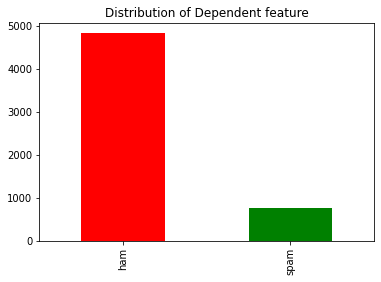

In [ ]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

As we can see, the number of spam texts is a little less than 1000, where as, number of hams is almost 5000.

Clearly, we have an **imbalanced data**!

We will see how to fix that as we go.

## Text Cleaning & Preprocessing

Before we can go on training on our texts, we need to preprocess them.

### Q. What does preprocessing in text data look like?
To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects.

We first need to **tokenize** it, and then **clean** it as per our requirements.



### Q. What is meant by tokenizing a text?
Simply put, Tokenization is the process of Splitting a sentence into it's constituent words (i.e. individual **tokens**).

A token could be a **word**, or even a **punctuation**.

For example, the sentence "Hi my name is Anthony Gonsalves." upon tokenization becomes the following list. <br>
["my", 'Hi", "is", "Gonsalves", "Anthony", "name", "."]

### Q. How can we tokenize a given sentence?
Tokenization is a very fundamental step in NLP.

Hence, we have a built in funtion to tokenize present in the Natural Language Toolkit (NLTK) library.

We can simply call the `word_tokenize()` function on our sentence.

## Lowercasing
### Q. Suppose we have the words "Go" and "go" in our text. Should they be treated as different words?
 - If you think about it, there may occur the same word in our text, with different character as upercase.
 - We don't want to treat these **multiple instances of the same word** as different words.
 - One way to avoid doing so is, **converting all the characters into lowercase**.
 - This ensures that we dont consider the same word again just because it has a different character with upercase.

This ensures that "GO", "Go", "gO" and "go" are considered as the same word only.



## Removing Punctuations
### Q. In our sentence, we have various punctuation marks as well. Do we really need them?
**No.** We do not need punctuation marks as they **do not contribute any real meaning** to these texts.

### Q. How can we get rid of these punctuations?
To remove punctuations, we can use **regular expressions**.

Recall the lecture on **regular expressions**. If we have anything that is not an alphabet or a number, we can replace it with an empty string. This will ensure that we have gotten rid of all punctuations.

## Removing stopwords
### Q. What are stop words?
- Stopwords are the words in any language which does not add much meaning to a sentence.
- They can **safely be ignored without sacrificing the meaning of the sentence**.
- These are some of the most common, short function words, such as the, is, at, which, and on.
-
They add no **real meaning** to our text as  they carry **very little** useful information.



### Q. Why do we remove stop words?
- In this NLP task, i.e. spam classification (or even sentiment analysis), essentially what we need to do is look at all the words, and based on whether we find words that can positively indicate that the given email is a spam, we classify it as a spam.

- We don't have to make a complete grammatical sense out of our text, so we can remove words that add no real meaning, because otherwise, parsing through them is only making it more **computationally heavy**, for no reason.

- But there are tasks like translation, then we cannot remove stop words.

### Q. Wouldn't removing stop words lead to grammatical errors?
**Yes**. It will.

But since to understand context from keywords, grammer is not important hence we use stopwords removal technique

We have combined all these preprocessing steps (tokenization, lowercasing, punctuation removal, stop words removal, excessive white space removal) into a single function `clean_tokenized_sentence(s)` where s is a **sentence**, and we return the resultant string as `cleaned_s`.

In [ ]:
def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

Calling the `clean_tokenized_sentence(s)` function onto each text in our dataset using the **apply** method, and storing them in a new column, `cleaned_message`

In [ ]:
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


## Most common words in Spam and Ham

### Our goal at end is to implement Multinomial Naive Bayes Algorithm, but in order to do that, we would need data about the **word frequencies**. How do we do that?

Recall that unlike Bernoulli NB, where we need to know if a specific word exists or not in the given text (0 or 1), in Multinomial NB, we need to know the frequency of occurrence of the words in a given text.

In order to calculate the same, we employ the use of `Counter` from the `collections` library.

The **Counter()** counts the number of time each word occurs after splitting.

### Q. How do we get the top 20 words that occur the most in ham texts?
- We need to first filter the non-spam rows
- Obtain the cleaned message
- Split the messages into words
- Invoke the Counter() object

In [ ]:
# First, let's filter the texts that are of type = 'ham'
ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
# Since we only wish to look at our preprocessed text, we get the cleaned_message column
ham = ham['cleaned_message']
ham

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
3                     u dun say early hor u c already say
4               nah nt think goes usf lives around though
6          even brother like speak treat like aids patent
                              ...                        
5565                                              huh lei
5568                         ì_ b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: cleaned_message, Length: 4825, dtype: object

In [ ]:
# we wish to join all these texts, so as to form a single string
ham = " ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try 2 months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left di

In [ ]:
# In order to get these words counted by Counter(), we need to tokenize (split the strings into words)
ham = ham.split()
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'nt',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',


In [ ]:
# Now we invoke the Counter() object, and get the top 20 words
counter_ham = Counter(ham).most_common(20)
counter_ham

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

**Note:** Counter() object returns a **dictionary**, with word as the key, and it's count as the respective value.

But when we call the `most_common()` method, we get a **list of tuples** as the result.

In [ ]:
# Alternativly, we could've clubbed these steps into one line as
# counter_ham = Counter(" ".join(df[df['type']=='ham']["cleaned_message"]).split()).most_common(20)

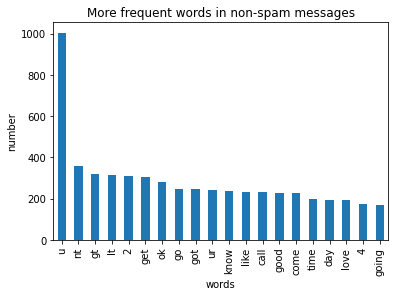

In [ ]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

Similarily, we plot the data for 20 most common words in spam texts.

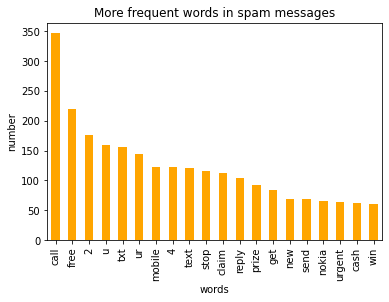

In [ ]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

We can see that there is a difference of words contained in spam and ham messages.

Spam messages have words like, "call", "free", "mobile", "claim", "prize", etc.


## Generate Datasets

Converting the categorical feature `type` into a numerical feature by mapping spam value as 1, and ham values as 0.

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

Performing the `train_test_split`

In [ ]:
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


## Multinomial NB

### Q. Do you Recall what kind of features we feed to Multinomial NB?
We need our data to have words across the columns and texts along the rows.

Such that the cell of text i and word j represents the number of times word j occurs in the text i.

### Q. How do we get the desired features?
In the **feature_extraction** library, We have a function of **text.CountVectorizer()** that vectorizes our data with the counts of occurences of words in a given text i.

As the name suggests, it convert text into a matrix of token counts.

### Q. Will this matrix be dense or sparse?
Across all the text messages, there may be thousands of words i.e. thousands of features. But any given text would only have a hanful of words.

So, naturally, the value for only some of these features would be non-zero.

As a result, we get a **sparse matrix** indicating the counts of the few words that do exist out of the thousands of words.

### Q. Should we fit the CountVectorizer() on the entire dataset?
**NO.**

We only apply it on our **training data**, since we are only concerned with the words that are present in the train data while training.

### Q. Do we need to standardize data for Naive Bayes?
**No.**

Since Naive Bayes is **not a distane based algorithm**, but rather an **information based algorithm**.

Hence scaling does not help to converge it faster.

In [ ]:
#Count Vectorizer
f = feature_extraction.text.CountVectorizer()

X_train = f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

# No need of scaling


### Recall that we have a hyper parameter $α$ in NB. Let's try giving it a couple of values to see which gives us the best performance.

In [ ]:
params = {
        'alpha':[0.01, 0.1, 1, 10]
        }

We plug in the following values into our `GridSearchCV()` function to get the results:-
- Multinomial NB classifier,
- dictionary containing the range of values we wish to try for our hyperparameter,
- scoring metric
- number of folds for the cross validation set


In [ ]:
# Multinomial NB

from sklearn.model_selection import GridSearchCV

mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")



Parameters:{'alpha': 0.01} Mean_score: 0.8937240112174837 Rank: 2
Parameters:{'alpha': 0.1} Mean_score: 0.8896934746467164 Rank: 3
Parameters:{'alpha': 1} Mean_score: 0.9022297472053865 Rank: 1
Parameters:{'alpha': 10} Mean_score: 0.8603433402346446 Rank: 4


As you can see, we get the best performance when $α=1$, with a score of 0.9, which is pretty good!